In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/ecommerce_customer_behavior_dataset.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ecommerce_customer_behavior_dataset.csv")

In [ ]:
df = pd.read_excel("/content/ecommerce_customer_behavior_dataset.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [ ]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [ ]:
df.shape

(10000, 16)

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(10000, 16)

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


All are adult customer, no kids are in consideration

***Level 1***

** Q1: Find Mean, Median, and Mode (Age)**

In [ ]:
print(f"Mean value of Age: {df['Age'].mean()}")

print(f"Median value of Age: {df['Age'].median()}")

print(f"Mode value of Age: {df['Age'].mode()}")


Mean value of Age: 43.7899
Median value of Age: 44.0
Mode value of Age: 0    51
Name: Age, dtype: int64


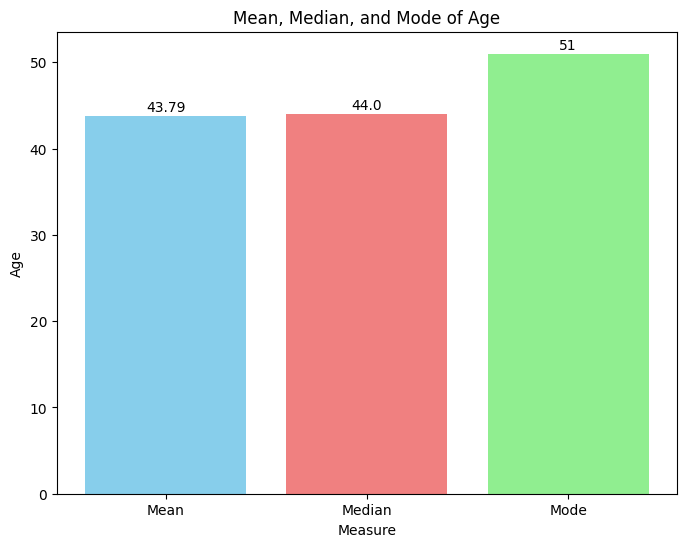

In [ ]:

import matplotlib.pyplot as plt

mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]
measures = ['Mean', 'Median', 'Mode']
values = [mean_age, median_age, mode_age]

plt.figure(figsize=(8, 6))
plt.bar(measures, values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Measure")
plt.ylabel("Age")
plt.title("Mean, Median, and Mode of Age")

for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center')

plt.show()

**Q2: Find variance, standard deviation, and z-score (Purchase Amount)**

In [ ]:
import scipy.stats as stats
print(f'Variance = {df["Purchase Amount ($)"].var()})')
print(f'Standard Deviation = {df["Purchase Amount ($)"].std()}')
print(f'Z-score = {stats.zscore(df["Purchase Amount ($)"])}')



Variance = 81932.24073019275)
Standard Deviation = 286.23808399685873
Z-score = 0      -1.052856
1       0.531219
2       1.606287
3      -0.063945
4      -1.259932
          ...   
9995   -1.413798
9996    1.026880
9997    1.105001
9998   -1.638412
9999   -0.944864
Name: Purchase Amount ($), Length: 10000, dtype: float64


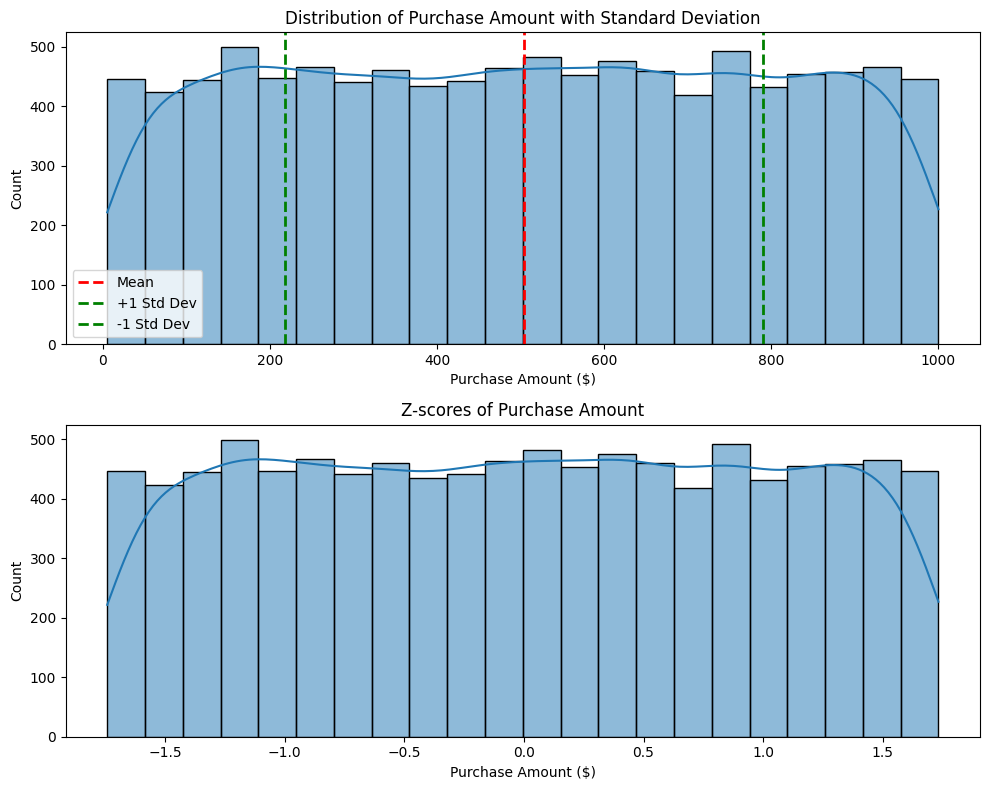

Variance of Purchase Amount: 81932.24073019275
Standard Deviation of Purchase Amount: 286.23808399685873


In [ ]:

variance_purchase = df['Purchase Amount ($)'].var()
std_dev_purchase = df['Purchase Amount ($)'].std()

fig, axes = plt.subplots(2, 1, figsize=(10, 8))


sns.histplot(df['Purchase Amount ($)'], ax=axes[0], kde=True)
axes[0].axvline(df['Purchase Amount ($)'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[0].axvline(df['Purchase Amount ($)'].mean() + std_dev_purchase, color='green', linestyle='dashed', linewidth=2, label='+1 Std Dev')
axes[0].axvline(df['Purchase Amount ($)'].mean() - std_dev_purchase, color='green', linestyle='dashed', linewidth=2, label='-1 Std Dev')
axes[0].set_title('Distribution of Purchase Amount with Standard Deviation')
axes[0].legend()


z_scores_purchase = stats.zscore(df['Purchase Amount ($)'])


sns.histplot(z_scores_purchase, ax=axes[1], kde=True)
axes[1].set_title('Z-scores of Purchase Amount')

plt.tight_layout()
plt.show()


print(f"Variance of Purchase Amount: {variance_purchase}")
print(f"Standard Deviation of Purchase Amount: {std_dev_purchase}")

**Q3: What are the top three product categories based on the number of purchases?**

In [ ]:
category_purchase_sum = df.groupby('Product Category')['Purchase Amount ($)'].sum()
top_3=category_purchase_sum.sort_values(ascending=False).head(3)
print(top_3)

Product Category
Toys     665535.38
Books    664338.38
Home     647106.92
Name: Purchase Amount ($), dtype: float64


In [ ]:
import plotly.express as px

category_purchase_sum = df.groupby('Product Category')['Purchase Amount ($)'].sum()

top_3 = category_purchase_sum.sort_values(ascending=False).head(3)

fig = px.pie(top_3.reset_index(),
             names='Product Category',
             values='Purchase Amount ($)',
             title='Top 3 Product Categories Based on Purchase Amount',
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.show()


In [ ]:

top_products = df['Product Category'].value_counts().reset_index()
top_products.columns = ['Product Category', 'Count']

top_3_products = top_products.head(3)
print(top_3_products)

fig = px.bar(top_3_products,
             x='Product Category',
             y='Count',
             title='Top 3 Product Categories Based on Number of Purchases',
             labels={'Count': 'Number of Purchases'},
             color='Product Category')

fig.show()




  Product Category  Count
0      Electronics   1309
1         Clothing   1297
2             Toys   1288


**Q4: How many customers are classified as return customers?**

In [ ]:
total_return_customers = df[df['Return Customer'] == True]['Customer ID'].nunique()
print(f'Return Customers are : {total_return_customers}')

Return Customers are : 4996


Number of Return Customers: 4996
Number of Non-Return Customers: 5004


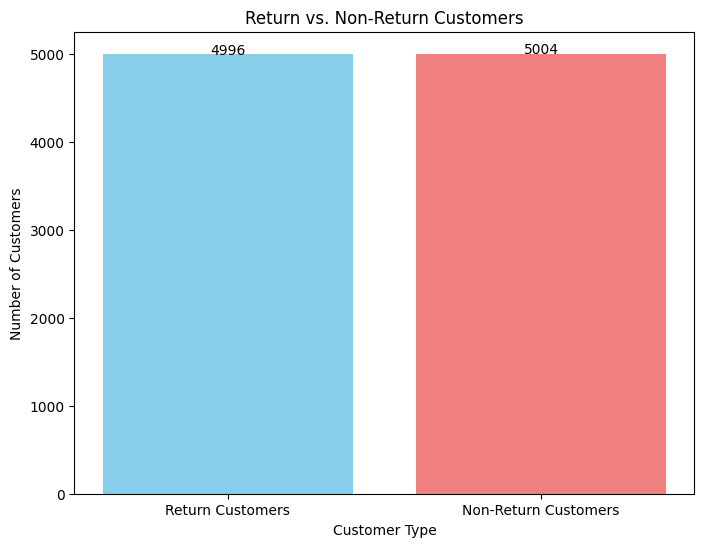

In [ ]:

return_customers = df[df['Return Customer'] == True]['Customer ID'].nunique()
non_return_customers = df[df['Return Customer'] == False]['Customer ID'].nunique()

print(f'Number of Return Customers: {return_customers}')
print(f'Number of Non-Return Customers: {non_return_customers}')

customer_types = ['Return Customers', 'Non-Return Customers']
customer_counts = [return_customers, non_return_customers]

plt.figure(figsize=(8, 6))
plt.bar(customer_types, customer_counts, color=['skyblue', 'lightcoral'])
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.title('Return vs. Non-Return Customers')

for i, v in enumerate(customer_counts):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.show()

In [ ]:

return_customer_counts = df['Return Customer'].value_counts().reset_index()
return_customer_counts.columns = ['Return Customer', 'Count']

fig_return_customers = px.pie(return_customer_counts,
                              names='Return Customer',
                              values='Count',
                              title='Number of Return Customers',
                              color_discrete_sequence=px.colors.sequential.Viridis)

fig_return_customers.show()


product_return_rate = df.groupby('Product Category')['Return Customer'].mean()

top_5_products = product_return_rate.sort_values(ascending=False).head(5).reset_index()
top_5_products.columns = ['Product Category', 'Return Rate']

fig_top_products = px.bar(
    top_5_products,
    x='Product Category',
    y='Return Rate',
    title='Top 5 Product Categories with the Highest Return Rate',
    labels={'Return Rate': 'Return Rate'},
    color='Return Rate',
    color_continuous_scale=px.colors.sequential.Viridis
)


fig_top_products.update_traces(texttemplate='%{y:.2%}', textposition='outside')
fig_top_products.update_layout(yaxis_tickformat='%')

fig_top_products.show()



**Q5: What is the average review score given by customers?**

In [ ]:
avg_review_score = df['Review Score (1-5)'].mean()
print(f'Average review score is : {avg_review_score}')

avg_review_per_product = df.groupby('Product Category')['Review Score (1-5)'].mean().reset_index()
avg_review_per_product.columns = ['Product Category', 'Average Review Score']

best_product = avg_review_per_product.loc[avg_review_per_product['Average Review Score'].idxmax()]

worst_product = avg_review_per_product.loc[avg_review_per_product['Average Review Score'].idxmin()]

print(f"Best Product based on average review: {best_product['Product Category']} with an average review score of {best_product['Average Review Score']:.2f}")
print(f"Worst Product based on average review: {worst_product['Product Category']} with an average review score of {worst_product['Average Review Score']:.2f}")


Average review score is : 2.9951
Best Product based on average review: Groceries with an average review score of 3.06
Worst Product based on average review: Books with an average review score of 2.93


In [ ]:

products = [best_product['Product Category'], worst_product['Product Category']]
average_scores = [best_product['Average Review Score'], worst_product['Average Review Score']]

fig = go.Figure(data=[
    go.Bar(name='Average Review Score', x=products, y=average_scores,
           marker_color=['green', 'red'])
])

fig.update_layout(
    title='Best and Worst Product Categories Based on Average Review Score',
    xaxis_title='Product Category',
    yaxis_title='Average Review Score',
    yaxis=dict(range=[0, 5]),
    showlegend=False
)

# Show the figure
fig.show()


**Q6: How does the average delivery time vary between subscription statuses (Free,
Premium)?**

In [ ]:
avg_delivery_time = df.groupby('Subscription Status')['Delivery Time (days)'].mean()

print(avg_delivery_time)


Subscription Status
Free       6.963924
Premium    7.070347
Trial      7.004272
Name: Delivery Time (days), dtype: float64


In [ ]:
average_delivery_time = df.groupby('Subscription Status')['Delivery Time (days)'].mean().reset_index()

average_delivery_time.columns = ['Subscription Status', 'Average Delivery Time (days)']

fig = px.bar(average_delivery_time,
             x='Subscription Status',
             y='Average Delivery Time (days)',
             title='Average Delivery Time by Subscription Status',
             labels={'Average Delivery Time (days)': 'Average Delivery Time (days)'},
             color='Average Delivery Time (days)',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()


In [ ]:
import plotly.express as px

top_products_by_subscription = df.groupby(['Subscription Status', 'Product Category']).size().reset_index(name='Purchase Count')

top_products = top_products_by_subscription.loc[top_products_by_subscription.groupby('Subscription Status')['Purchase Count'].idxmax()]

fig = px.bar(top_products,
             x='Subscription Status',
             y='Purchase Count',
             color='Product Category',
             title='Top Product Bought by Subscription Status',
             labels={'Purchase Count': 'Number of Purchases'},
             text='Product Category')

fig.show()


**Q7: How many customers are subscribed to the service?**

In [ ]:
subscribers = df['Subscription Status'].value_counts()
print(subscribers)

Subscription Status
Premium    3369
Free       3354
Trial      3277
Name: count, dtype: int64


In [ ]:

import plotly.express as px

subscription_counts = df['Subscription Status'].value_counts()

fig = px.pie(subscription_counts,
             values=subscription_counts.values,
             names=subscription_counts.index,
             title='Subscription Status Percentage',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

In [ ]:
import pandas as pd

premium_customers = df[df['Subscription Status'] == 'Premium']

bins = [0, 18, 35, 50, 65, 80]
labels = ['0-17', '18-34', '35-49', '50-64', '65+']

premium_customers['Age Range'] = pd.cut(premium_customers['Age'], bins=bins, labels=labels, right=False)

age_range_counts = premium_customers['Age Range'].value_counts().reset_index(name='Count')
age_range_counts.columns = ['Age Range', 'Count']

top_age_ranges = age_range_counts.sort_values(by='Count', ascending=False)
print("Age Ranges among Premium Customers:")
print(top_age_ranges)


Age Ranges among Premium Customers:
  Age Range  Count
0     18-34   1054
1     50-64   1035
2     35-49    945
3       65+    335
4      0-17      0


<ipython-input-26-c810e0998a8e>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.pie(age_range_counts, values='Count', names='Age Range', title='Age Distribution of Premium Customers')

# Show the figure
fig.show()

**Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,
Tablet)**

In [ ]:
devices = df['Device Type'].value_counts(normalize=True)*100
print(devices)

Device Type
Mobile     33.74
Desktop    33.48
Tablet     32.78
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import plotly.express as px

devices = df['Device Type'].value_counts(normalize=True) * 100
devices_df = devices.reset_index()
devices_df.columns = ['Device Type', 'Percentage']
fig = px.bar(devices_df,
             x='Device Type',
             y='Percentage',
             title='Device Type Distribution',
             labels={'Percentage': 'Percentage (%)'},
             color='Percentage',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_donut_chart(subscription_status):
    customers = df[df['Subscription Status'] == subscription_status]


    device_counts = customers['Device Type'].value_counts().reset_index()
    device_counts.columns = ['Device Type', 'Count']

    return device_counts

fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]],
                    subplot_titles=('Premium Subscribers',
                                   'Free Subscribers',
                                   'Trial Subscribers'))

premium_data = create_donut_chart('Premium')
free_data = create_donut_chart('Free')
trial_data = create_donut_chart('Trial')

fig.add_trace(go.Pie(values=premium_data['Count'],
                     labels=premium_data['Device Type'],
                     hole=0.4,
                     name='Premium'),
              row=1, col=1)

fig.add_trace(go.Pie(values=free_data['Count'],
                     labels=free_data['Device Type'],
                     hole=0.4,
                     name='Free'),
              row=1, col=2)

fig.add_trace(go.Pie(values=trial_data['Count'],
                     labels=trial_data['Device Type'],
                     hole=0.4,
                     name='Trial'),
              row=1, col=3)

fig.update_layout(title_text='Device Distribution by Subscription Status',
                  title_x=0.5)

fig.show()


**Q9: What is the average purchase amount for customers who availed discounts compared
to those who didn’t?**

In [ ]:
avg_purchase_coupon = df.groupby('Discount Availed')['Purchase Amount ($)'].mean()
print(avg_purchase_coupon)

Discount Availed
False    502.511451
True     505.264178
Name: Purchase Amount ($), dtype: float64


**Q10: What is the most common payment method used by customers?**

In [ ]:
common_payment_method = df['Payment Method'].value_counts().idxmax()
print(f'Most common payment method: {common_payment_method}')

Most common payment method: Bank Transfer


In [ ]:

payment_method_counts = df['Payment Method'].value_counts()

fig = px.bar(payment_method_counts,
             x=payment_method_counts.index,
             y=payment_method_counts.values,
             title='Distribution of Payment Methods',
             labels={'x': 'Payment Method', 'y': 'Number of Customers'},
             color=payment_method_counts.index)

fig.show()

***Level 2***

**Q1: What are the average review scores of users of the most common payment method?**

In [ ]:

common_payment_users = df[df['Payment Method'] == common_payment_method]
avg_review_cpu = common_payment_users['Review Score (1-5)'].mean()

print(f'Average review score of users of the most common payment method {common_payment_method}: {avg_review_cpu}')

Average review score of users of the most common payment method Bank Transfer: 2.9888727624576683


In [ ]:
import pandas as pd
import plotly.express as px

avg_review_by_payment = df.groupby('Payment Method')['Review Score (1-5)'].mean().reset_index()

avg_review_by_payment.columns = ['Payment Method', 'Average Review Score']

common_payment_method = df['Payment Method'].value_counts().idxmax()
common_payment_users = df[df['Payment Method'] == common_payment_method]
avg_review_cpu = common_payment_users['Review Score (1-5)'].mean()

print(f'Average review score of users of the most common payment method ({common_payment_method}): {avg_review_cpu:.2f}')

fig = px.bar(avg_review_by_payment,
             x='Payment Method',
             y='Average Review Score',
             title='Average Review Score by Payment Method',
             labels={'Average Review Score': 'Average Review Score'},
             color='Average Review Score',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()


Average review score of users of the most common payment method (Bank Transfer): 2.99


In [ ]:
import pandas as pd
import plotly.express as px

top_payment_methods = df['Payment Method'].value_counts().head(2).index.tolist()

bins = [0, 18, 35, 50, 65, 80]
labels = ['0-17', '18-34', '35-49', '50-64', '65+']

age_distribution_data = []

for payment_method in top_payment_methods:
    users = df[df['Payment Method'] == payment_method]
    users['Age Range'] = pd.cut(users['Age'], bins=bins, labels=labels, right=False)
    age_counts = users['Age Range'].value_counts().reset_index()
    age_counts.columns = ['Age Range', 'Count']
    age_counts['Payment Method'] = payment_method
    age_distribution_data.append(age_counts)

age_distribution_df = pd.concat(age_distribution_data)

fig_age_distribution = px.bar(age_distribution_df,
                               x='Age Range',
                               y='Count',
                               color='Payment Method',
                               barmode='group',
                               title='Age Distribution by Payment Method',
                               labels={'Count': 'Number of Users'})

fig_age_distribution.show()


<ipython-input-43-d001037df513>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-d001037df513>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-10-72b2390ce7e1>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



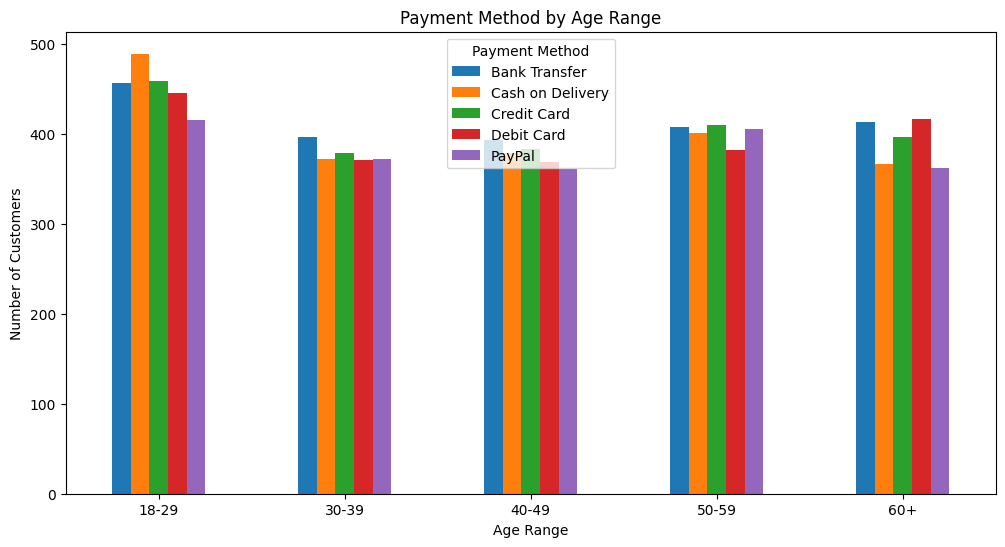

In [ ]:

bins = [18, 30, 40, 50, 60, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

payment_by_age = df.groupby(['Age Range', 'Payment Method'])['Customer ID'].count().unstack()


fig = payment_by_age.plot(kind='bar', figsize=(12, 6))
plt.title('Payment Method by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

**Here we can see, 18-29 years old adults more comfortable to buy on cash on delivery. Whether, 30+ years old peoples popular choice is bank transfer.**

**Q2: What is the correlation between time spent on the website and purchase amount? Do
customers who spend more time on the website purchase more items?**

In [ ]:
corr_timespent_purchase = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])
print(corr_timespent_purchase)

0.01002480995875274


In [ ]:

fig = px.scatter(df, x='Time Spent on Website (min)', y='Purchase Amount ($)',
                 title='Correlation between Time Spent on Website and Purchase Amount',
                 labels={'Time Spent on Website (min)': 'Time Spent on Website (minutes)',
                         'Purchase Amount ($)': 'Purchase Amount ($)'})

fig.show()

As we can see, the correlation between time spent on the website and Purchase of items is very low which is around 0.01.

In [ ]:
corr_timespent_items = df['Time Spent on Website (min)'].corr(df['Number of Items Purchased'])
print(corr_timespent_items)

0.00014797204544230073


**So, spending more time on the website doesn't mean he/she would buy more items.**

**Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return
customers?**

In [ ]:
satisfied_customers = df[df['Review Score (1-5)'] >= 4]
return_satisfied_customers = satisfied_customers[satisfied_customers['Return Customer'] == True]
percentage_rsc = (len(return_satisfied_customers) / len(df)) * 100


print(f"Percentage of satisfied return customers: {percentage_rsc:.2f}%")

Percentage of satisfied return customers: 20.08%


In [ ]:

import plotly.graph_objects as go

satisfied_customers = df[df['Review Score (1-5)'] >= 4]
dissatisfied_customers = df[df['Review Score (1-5)'] <= 3]

satisfied_return_percentage = (len(satisfied_customers[satisfied_customers['Return Customer'] == True]) / len(satisfied_customers)) * 100
dissatisfied_return_percentage = (len(dissatisfied_customers[dissatisfied_customers['Return Customer'] == True]) / len(dissatisfied_customers)) * 100


labels = ['Satisfied Return Customers', 'Satisfied Non-Return Customers', 'Dissatisfied Return Customers', 'Dissatisfied Non-Return Customers']
values = [
    len(satisfied_customers[satisfied_customers['Return Customer'] == True]),
    len(satisfied_customers[satisfied_customers['Return Customer'] == False]),
    len(dissatisfied_customers[dissatisfied_customers['Return Customer'] == True]),
    len(dissatisfied_customers[dissatisfied_customers['Return Customer'] == False])
]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="Return Customer Percentage by Rating")
fig.show()

In [ ]:


return_customers = df[df['Return Customer'] == True]
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
return_customers['Age Range'] = pd.cut(return_customers['Age'], bins=bins, labels=labels, right=False)
age_range_counts = return_customers['Age Range'].value_counts().reset_index()
age_range_counts.columns = ['Age Range', 'Count']

print("Age Ranges of Return Customers:")
print(age_range_counts)


fig = px.bar(age_range_counts, x='Age Range', y='Count', title='Age Distribution of Return Customers')
fig.show()

Age Ranges of Return Customers:
  Age Range  Count
0     55-64   1006
1     35-44    962
2     25-34    947
3     45-54    945
4     18-24    661
5       65+    475


<ipython-input-14-f059f256b5fc>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Q4: What is the relationship between the number of items purchased and customer
satisfaction?**

In [ ]:
corr_itembuy_satisfaction = df['Number of Items Purchased'].corr(df['Review Score (1-5)'])
print(corr_itembuy_satisfaction)

0.009678937188650571


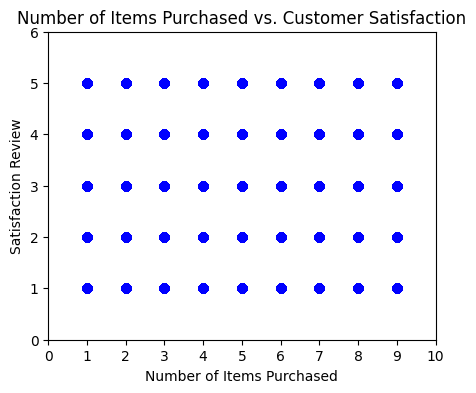

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(df['Number of Items Purchased'], df['Review Score (1-5)'], color='blue')
plt.title('Number of Items Purchased vs. Customer Satisfaction')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Satisfaction Review')

plt.xticks(range(0, 11))
plt.yticks(range(0, 7))
plt.show()

In [ ]:
avg_ratings_bypurchase = df.groupby('Number of Items Purchased')['Review Score (1-5)'].mean()
print(avg_ratings_bypurchase)

Number of Items Purchased
1    2.966192
2    2.990868
3    2.987061
4    3.065354
5    2.946678
6    2.943850
7    2.981900
8    3.017715
9    3.059150
Name: Review Score (1-5), dtype: float64


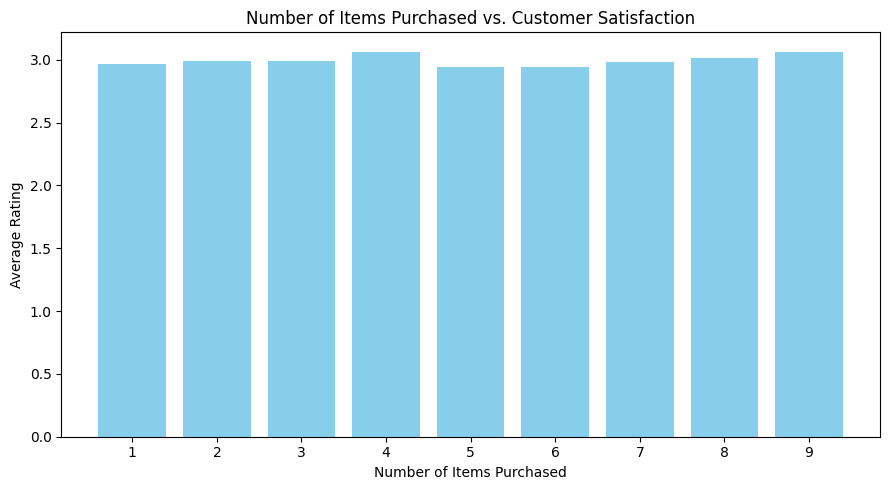

In [ ]:

plt.figure(figsize=(9,5))
plt.bar(avg_ratings_bypurchase.index, avg_ratings_bypurchase, color='skyblue')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Average Rating')
plt.title('Number of Items Purchased vs. Customer Satisfaction')
plt.xticks(avg_ratings_bypurchase.index)
plt.tight_layout()
plt.show()

In [ ]:
purchase_satisfaction_counts = df.groupby(['Number of Items Purchased', 'Customer Satisfaction'])['Customer ID'].count().unstack()

fig = px.bar(purchase_satisfaction_counts,
             barmode='group',
             title='Number of Items Purchased vs. Customer Satisfaction',
             labels={'value': 'Number of Customers',
                     'Number of Items Purchased': 'Number of Items Purchased',
                     'variable': 'Customer Satisfaction'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

**Q5: Which location has the 2nd highest average purchase amount?**

In [ ]:

location_avg_purchase = df.groupby('Location')['Purchase Amount ($)'].mean()

sorted_avg_purchase = location_avg_purchase.sort_values(ascending=False)

second_highest_avg_purchase = sorted_avg_purchase.iloc[1]
second_highest_location = sorted_avg_purchase.index[1]
print(f"The location with the second highest average purchase amount is: {second_highest_location}")
print(f"The second highest average purchase amount is: {second_highest_avg_purchase:.2f}")


The location with the second highest average purchase amount is: Barisal
The second highest average purchase amount is: 513.67


In [ ]:

location_avg_purchase = df.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False)
fig = px.bar(location_avg_purchase,
             x=location_avg_purchase.index,
             y=location_avg_purchase.values,
             title='Average Purchase Amount by Location (Sorted)',
             labels={'x': 'Location', 'y': 'Average Purchase Amount'},
             color=location_avg_purchase.values)

fig.show()

***Level 3***

**Q1: What factors contribute most to a customer being classified as a return customer?**

In [ ]:

return_customer_satisfaction = df.groupby('Customer Satisfaction')['Return Customer'].mean() * 100

print(return_customer_satisfaction)

fig = px.bar(return_customer_satisfaction.reset_index(),
             x='Customer Satisfaction',
             y='Return Customer',
             title='Percentage of Return Customers by Customer Satisfaction',
             labels={'Customer Satisfaction': 'Customer Satisfaction',
                     'Return Customer': 'Return Customer (%)'},
             color='Customer Satisfaction')

fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')
fig.show()

Customer Satisfaction
High      49.092010
Low       50.341753
Medium    50.435305
Name: Return Customer, dtype: float64


In [ ]:

return_customer_by_review = df.groupby(['Review Score (1-5)', 'Return Customer'])['Customer ID'].count().unstack()

return_customer_percentage = (return_customer_by_review[True] / (return_customer_by_review[True] + return_customer_by_review[False])) * 100

print(return_customer_percentage)

import plotly.express as px

fig = px.bar(
    return_customer_percentage.reset_index(),
    x='Review Score (1-5)',
    y=0,
    title='Percentage of Return Customers by Review Score',
    labels={'Review Score (1-5)': 'Review Score', 0: 'Percentage of Return Customers'},
)
fig.show()

Review Score (1-5)
1    49.570490
2    48.465347
3    51.477216
4    49.927850
5    50.389610
dtype: float64


In [ ]:
return_customers = df[df['Return Customer'] == 1]

return_customers_by_category = return_customers['Product Category'].value_counts()

print("Return Customers by Product Category:")
print(return_customers_by_category)

Return Customers by Product Category:
Product Category
Clothing       666
Electronics    666
Toys           663
Home           630
Beauty         613
Books          610
Groceries      583
Sports         565
Name: count, dtype: int64


In [ ]:

return_customer_purchase_category = df[df['Return Customer'] == True].groupby('Product Category')['Customer ID'].count()

return_customer_purchase_category_sorted = return_customer_purchase_category.sort_values(ascending=False)

fig = px.bar(
    x=return_customer_purchase_category_sorted.index,
    y=return_customer_purchase_category_sorted.values,
    title='Return Customer Purchase Category',
    labels={'x': 'Product Category', 'y': 'Number of Return Customers'},
    color=return_customer_purchase_category_sorted.index
)


fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [ ]:
return_customers_df = df[df['Return Customer'] == 1]
return_customers_by_satisfaction = return_customers_df['Customer Satisfaction'].value_counts()

print("Return Customers by Customer Satisfaction Level:")
print(return_customers_by_satisfaction)

Return Customers by Customer Satisfaction Level:
Customer Satisfaction
Low       1694
Medium    1680
High      1622
Name: count, dtype: int64


In [ ]:
import plotly.express as px

return_customers_by_satisfaction = df[df['Return Customer'] == True]['Customer Satisfaction'].value_counts().reset_index()
return_customers_by_satisfaction.columns = ['Customer Satisfaction', 'Count']

fig = px.bar(return_customers_by_satisfaction,
             x='Customer Satisfaction',
             y='Count',
             title='Return Customers by Customer Satisfaction Level',
             labels={'Customer Satisfaction': 'Customer Satisfaction Level',
                     'Count': 'Number of Return Customers'},
             color='Customer Satisfaction')

fig.show()

<ipython-input-49-05815478cd6b>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-49-05815478cd6b>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



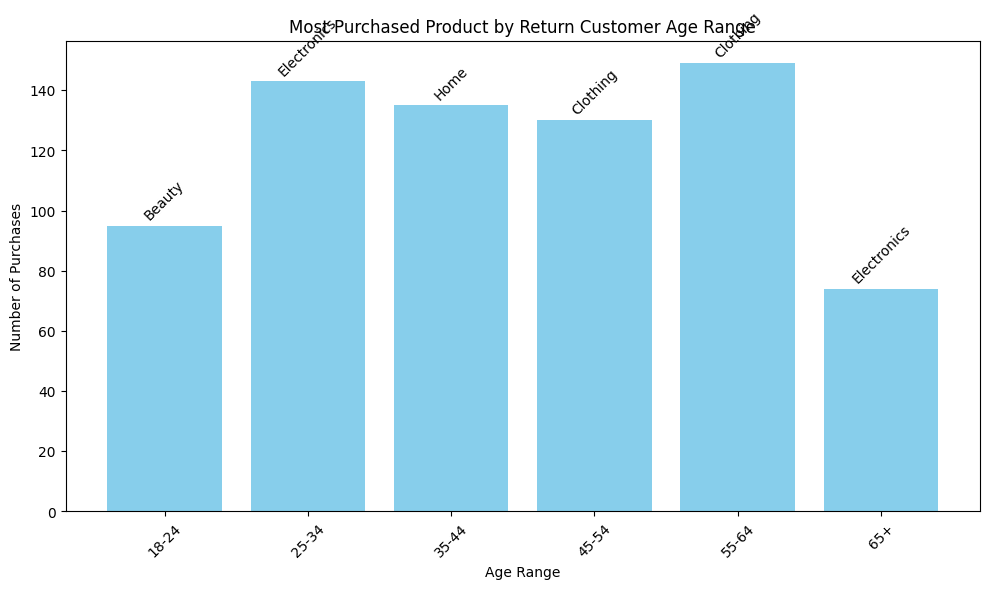

In [ ]:

bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

return_customers = df[df['Return Customer'] == True]

most_purchased_product_by_age = return_customers.groupby(['Age Range', 'Product Category'])['Customer ID'].count().reset_index(name='Purchase Count')
most_purchased_product_by_age = most_purchased_product_by_age.loc[most_purchased_product_by_age.groupby('Age Range')['Purchase Count'].idxmax()]


plt.figure(figsize=(10, 6))
plt.bar(most_purchased_product_by_age['Age Range'], most_purchased_product_by_age['Purchase Count'], color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Number of Purchases')
plt.title('Most Purchased Product by Return Customer Age Range')
plt.xticks(rotation=45)

for i, (age_range, purchase_count) in enumerate(zip(most_purchased_product_by_age['Age Range'], most_purchased_product_by_age['Purchase Count'])):
    product_category = most_purchased_product_by_age.loc[most_purchased_product_by_age['Age Range'] == age_range, 'Product Category'].iloc[0]
    plt.text(i, purchase_count + 1, product_category, ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:

return_customer_analysis = df[df['Return Customer'] == True].groupby(['Gender', 'Product Category', 'Age Range'])['Customer ID'].count().reset_index(name='Customer Count')

most_purchased_category = return_customer_analysis.loc[return_customer_analysis.groupby(['Gender', 'Age Range'])['Customer Count'].idxmax()]
fig = px.bar(most_purchased_category,
             x='Age Range',
             y='Customer Count',
             color='Product Category',
             facet_col='Gender',
             title='Return Customers: Most Purchased Category by Gender and Age Range',
             labels={'Customer Count': 'Number of Return Customers'},
             category_orders={'Age Range': sorted(df['Age Range'].unique())})

fig.show()

<ipython-input-39-4fc4a5d046cd>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-39-4fc4a5d046cd>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**We can see that most female**

In [ ]:

return_customer_payment_counts = df[df['Return Customer'] == True]['Payment Method'].value_counts()

fig = px.bar(
    return_customer_payment_counts,
    x=return_customer_payment_counts.index,
    y=return_customer_payment_counts.values,
    title="Popular Payment Method Choices of Return Customers",
    labels={"x": "Payment Method", "y": "Number of Return Customers"},
    color=return_customer_payment_counts.index,
)

fig.update_layout(xaxis_title="Payment Method", yaxis_title="Number of Return Customers")

fig.show()

In [ ]:
return_customers_by_payment_method = return_customers_df['Payment Method'].value_counts()

print("Return Customers by Payment Method:")
print(return_customers_by_payment_method)

Return Customers by Payment Method:
Payment Method
Bank Transfer       1046
Credit Card         1039
Cash on Delivery     982
Debit Card           974
PayPal               955
Name: count, dtype: int64


In [ ]:
return_customers_by_location = return_customers_df['Location'].value_counts()
return_customers_by_location = return_customers_by_location.sort_values(ascending=False)
print("Return Customers by Location:")
print(return_customers_by_location)

Return Customers by Location:
Location
Rangpur       644
Khulna        640
Rajshahi      637
Mymensingh    636
Chittagong    631
Barisal       610
Dhaka         603
Sylhet        595
Name: count, dtype: int64


In [ ]:

purchase_return_location_comparison = pd.crosstab(df['Location'], df['Return Customer'])

purchase_return_location_comparison = purchase_return_location_comparison.rename(columns={False: 'Not Return Customer', True: 'Return Customer'})

fig = px.bar(
    purchase_return_location_comparison,
    barmode='group',
    title='Comparison of Non-return Location and Return Customer Location',
    labels={'value': 'Number of Customers'},
)

fig.show()

In [ ]:

return_customers = df[df['Return Customer'] == True]

bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

return_customers['Age Range'] = pd.cut(return_customers['Age'], bins=bins, labels=labels, right=False)
age_range_counts = return_customers['Age Range'].value_counts().reset_index()
age_range_counts.columns = ['Age Range', 'Count']

print("Age Ranges of Return Customers:")
print(age_range_counts)


fig = px.bar(age_range_counts, x='Age Range', y='Count', title='Age Distribution of Return Customers')
fig.show()

<ipython-input-46-b63b97055e4d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age Ranges of Return Customers:
  Age Range  Count
0     55-64   1006
1     35-44    962
2     25-34    947
3     45-54    945
4     18-24    661
5       65+    475


**Q2: How do payment methods influence customer satisfaction and return rates?**

In [ ]:
total_pay_method = df['Payment Method'].value_counts()
total_pay_method = total_pay_method.sort_values(ascending=False)
print(total_pay_method)

Payment Method
Bank Transfer       2067
Credit Card         2028
Cash on Delivery    2007
Debit Card          1983
PayPal              1915
Name: count, dtype: int64


In [ ]:
satisfaction_by_payment = df.groupby(['Payment Method', 'Customer Satisfaction']).size().unstack(fill_value=0)
satisfaction_by_payment = satisfaction_by_payment.sort_values(by='High', ascending=False)
print("Customer Satisfaction by Payment Method:")
print(satisfaction_by_payment)

Customer Satisfaction by Payment Method:
Customer Satisfaction  High  Low  Medium
Payment Method                          
Credit Card             703  697     628
Bank Transfer           702  678     687
Debit Card              668  664     651
Cash on Delivery        627  703     677
PayPal                  604  623     688


Bank Transfer payment is popular choice in terms of high and medium satisfaction.

In [ ]:

satisfaction_by_payment = df.groupby(['Payment Method', 'Customer Satisfaction'])['Customer ID'].count().unstack()

satisfaction_percentage = satisfaction_by_payment.div(satisfaction_by_payment.sum(axis=1), axis=0) * 100

fig = px.bar(
    satisfaction_percentage.reset_index(),
    x="Payment Method",
    y=["High", "Medium", "Low"],
    title="Customer Satisfaction by Payment Method",
    labels={"value": "Percentage of Customers", "variable": "Customer Satisfaction"},
    barmode="group"
)

fig.show()

return_rate_by_payment = df.groupby('Payment Method')['Return Customer'].mean() * 100

fig = px.bar(
    return_rate_by_payment.reset_index(),
    x="Payment Method",
    y="Return Customer",
    title="Return Rate by Payment Method",
    labels={"Return Customer": "Return Rate (%)"}
)

fig.show()

In [ ]:
return_customers_by_payment_method = return_customers_df['Payment Method'].value_counts(normalize=True) * 100
return_customers_by_payment_method = return_customers_by_payment_method.sort_values(ascending=False)

print("Return Customers by Payment Method:")
print(return_customers_by_payment_method)

Return Customers by Payment Method:
Payment Method
Bank Transfer       20.936749
Credit Card         20.796637
Cash on Delivery    19.655725
Debit Card          19.495596
PayPal              19.115292
Name: proportion, dtype: float64


We can see Bank transfer influence customer to returns and buy again.

**Q3: How does the location influence both purchase amount and delivery time?**

In [ ]:
avg_delivery_time_by_location = df.groupby('Location')['Delivery Time (days)'].mean()

avg_delivery_time_by_location = avg_delivery_time_by_location.sort_values(ascending=True)
print("Average Delivery Time by Location:")
print(avg_delivery_time_by_location)

Average Delivery Time by Location:
Location
Khulna        6.811774
Dhaka         6.941957
Sylhet        7.018593
Chittagong    7.020440
Rangpur       7.031125
Barisal       7.072800
Mymensingh    7.099219
Rajshahi      7.113130
Name: Delivery Time (days), dtype: float64


In [ ]:

import pandas as pd

delivery_time_counts = df.groupby(['Location', 'Delivery Time (days)'])['Customer ID'].count().reset_index(name='Count')
most_common_delivery_time = delivery_time_counts.loc[delivery_time_counts.groupby('Location')['Count'].idxmax()]

print("Most common delivery time for each location:")
print(most_common_delivery_time)


Most common delivery time for each location:
       Location  Delivery Time (days)  Count
10      Barisal                    11    113
18   Chittagong                     6    112
30        Dhaka                     5    109
43       Khulna                     5    113
55   Mymensingh                     4    123
76     Rajshahi                    12    109
83      Rangpur                     6    105
100      Sylhet                    10    108


In [ ]:
purchases_by_location = df.groupby('Location').size()
purchases_by_location = purchases_by_location.sort_values(ascending=False)
print("Number of Purchases by Location:")
print(purchases_by_location)

Number of Purchases by Location:
Location
Khulna        1291
Mymensingh    1280
Chittagong    1272
Rangpur       1253
Barisal       1250
Sylhet        1237
Rajshahi      1211
Dhaka         1206
dtype: int64


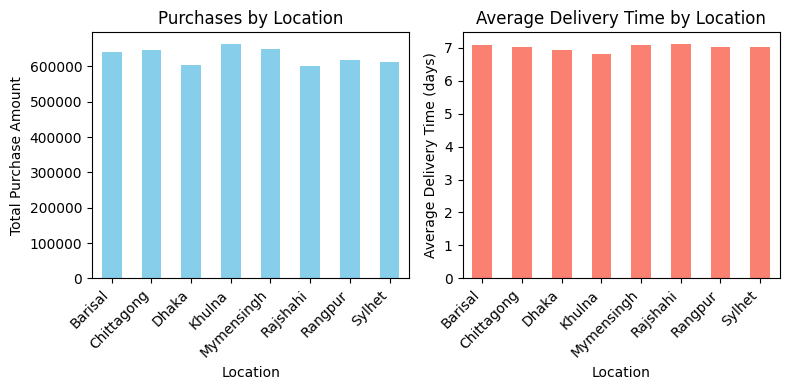

In [ ]:

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
purchases_by_location = df.groupby('Location')['Purchase Amount ($)'].sum()
purchases_by_location.plot(kind='bar', color='skyblue')
plt.title('Purchases by Location')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
avg_delivery_time_by_location = df.groupby('Location')['Delivery Time (days)'].mean()
avg_delivery_time_by_location.plot(kind='bar', color='salmon')
plt.title('Average Delivery Time by Location')
plt.xlabel('Location')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**We can see that, Khulna is the most influential location for more product purchases, and less average delivery time**

In [ ]:

import pandas as pd

khulna_data = df[df['Location'] == 'Khulna']

category_purchase_khulna = khulna_data.groupby('Product Category')['Purchase Amount ($)'].sum().sort_values(ascending=False)

print(category_purchase_khulna)

Product Category
Clothing       96342.25
Toys           94276.17
Electronics    85505.69
Groceries      82353.12
Home           82309.03
Sports         77684.77
Books          77258.25
Beauty         67763.48
Name: Purchase Amount ($), dtype: float64


In [ ]:

avg_delivery_time_by_category = df.groupby('Product Category')['Delivery Time (days)'].mean()

sorted_avg_delivery_time = avg_delivery_time_by_category.sort_values()

print(sorted_avg_delivery_time)

Product Category
Clothing       6.903624
Groceries      6.960604
Electronics    6.993125
Books          7.029134
Sports         7.034813
Beauty         7.056143
Home           7.057708
Toys           7.071429
Name: Delivery Time (days), dtype: float64


In [ ]:

rajshahi_data = df[df['Location'] == 'Rajshahi']

category_purchase_rajshahi = rajshahi_data.groupby('Product Category')['Purchase Amount ($)'].sum()
category_purchase_rajshahi = category_purchase_rajshahi.sort_values(ascending=False)


print(f"The most purchased category in Rajshahi is: {category_purchase_rajshahi}")

The most purchased category in Rajshahi is: Product Category
Clothing       84319.87
Toys           82032.49
Electronics    79859.53
Beauty         74778.48
Books          73451.12
Home           71301.88
Groceries      69719.54
Sports         64641.66
Name: Purchase Amount ($), dtype: float64


In [ ]:

avg_time_spent_by_category = df.groupby('Product Category')['Time Spent on Website (min)'].mean()
avg_time_spent_by_category = avg_time_spent_by_category.sort_values(ascending=False)

print(avg_time_spent_by_category)

Product Category
Groceries      30.381391
Sports         30.230635
Clothing       30.183500
Home           30.174704
Books          30.053543
Toys           29.815217
Beauty         29.564687
Electronics    29.014515
Name: Time Spent on Website (min), dtype: float64


In [ ]:
# prompt: total Number of Items Purchased of each category and average price of each item

# Group by 'Product Category' and calculate the total number of items purchased for each category
total_items_by_category = df.groupby('Product Category')['Number of Items Purchased'].sum()

# Calculate the average price for each item in each category
average_price_by_category = df.groupby('Product Category')['Purchase Amount ($)'].sum() / df.groupby('Product Category')['Number of Items Purchased'].sum()
average_price_by_category = average_price_by_category.sort_values(ascending=False)
# Print the results
print("Total Number of Items Purchased by Category:\n", total_items_by_category)
print("\nAverage Price of Item by Category:\n", average_price_by_category)

Total Number of Items Purchased by Category:
 Product Category
Beauty         6057
Books          6533
Clothing       6359
Electronics    6469
Groceries      6067
Home           6214
Sports         5706
Toys           6580
Name: Number of Items Purchased, dtype: int64

Average Price of Item by Category:
 Product Category
Home           104.136936
Clothing       101.721738
Books          101.689634
Toys           101.145195
Beauty          99.596880
Groceries       99.579789
Sports          99.361935
Electronics     99.045857
dtype: float64
